# AI4GSD Demo for grain size extraction
------------------------------------------
## Drone Video
------------------------------------------
#### Table of contents
#### 0. Installing requried packages (please restart the kernel after installation)
#### 1. Import required packages
#### 2. Define working directory
#### 3. Extracting or copying your videos/photos to desired folder
#### 4. Obtaining scales from AI for validation purpuse
#### 5. Obtaining segmentation of anthropogenic objects
#### 6. Obtaining grain size data

### 0. Installing requried packages (please restart the kernel after installation)

In [1]:
#!pip install --user natsort
#!pip install --user ismember

In [2]:
### 1. Import required packages

In [3]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
import AI4GSD

In [4]:
### 2. Define working directory

In [5]:
WorkDir = os.path.dirname(os.getcwd())
foldername = '20241130_YC_DJIFieldTest'                                    # Parent folder where you save photos/videos.
PhotoDir = WorkDir + os.sep + 'Demo_Data' + os.sep + foldername            

In [6]:
### 3. Extracting or copying your videos/photos to desired folder

In [7]:
#AI4GSD.getPhotos(PhotoDir,nframe=2000, overwrite=False)                   # Use once.

In [8]:
### 4. Obtaining scales from AI for validation purpuse

In [9]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.OverWriteAll = True                                                    # Overwrite everything if True.
PP.Directory = PhotoDir
PP.OverWriteScaleFile = False
PP.OverWriteScaleRows = True
PP.ScaleSource = 'log'                                                      # Use AI option.
PP.ModelName = 'YOLO11m.1280.20250825'                                     # Which AI to use.
PP.ComputingSource = 'local'                                               # What computing resource to use.
PP.ImageSizeFactor = 1                                                     # Do you need to user a larger image size for inference?
PP.ConfidenceThreshold = 0.85                                              # Minimum confidence threshold.
PP.YOLOSave = False                                                        # Need to save AI prediction to folder.
scales =  AI4GSD.metadata(PP)

Generating scale file for: 20241130_YC_DJIFieldTest
Reading DJI flight logs from files
1/2: photo 1/2, DJI_0113_257.png, scale log, res 0.56 mm/px, status -1, (50.00%), 1.59 s
2/2: photo 2/2, DJI_0113_4515.png, scale log, res 0.74 mm/px, status -1, (100.00%), 1.03 s
Total time: 2.75 s, time per photo 1.38 s
-----------------------------------------------------------------



In [10]:
### 5. Obtaining segmentation of anthropogenic objects

In [11]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.FolderLevel = 'L1'
PP.ModelName = 'YOLO11m.640.20250906'
PP.ObjectName = 'anthro'
PP.OverWriteSegementation = True
PP.YOLOSave = False
PP.YOLOIOU = 0.45
PP.ComputingSource = 'local'
PP.ImageSizeType = 'default'
PP.ImageSizeFactor=1
PP.SegmentationClassName = ['board','redbag','people']                     # What object class need to track.
AI4GSD.background(PP)

-----------------------------------------------------------------
Folder name: 20241130_YC_DJIFieldTest
output name: segments
Model name: YOLO11m.640.20250906 from local for anthro
Model layer: 125, model parmeter: 22.37M, submodule number: 445
IOU: 0.45, user confidence: 0.35
Number of photos: 2, number of exluded photos 0
20241130_YC_DJIFieldTest: 1/2, DJI_0113_257.png, no objects (50.00%)
20241130_YC_DJIFieldTest: 2/2, DJI_0113_4515.png, no objects (100.00%)
Total time: 20.54 s, time per photo 10.27 s
-----------------------------------------------------------------



In [12]:
### 6. Obtaining grain size data

AI4GSD: an AI and cloud powered tool for grain size quantification
AI models in use: YOLO11m.1280.20250322
Confidence thresholds in use: 0.35

-----------------------------------------------------------------
Folder name: 20241130_YC_DJIFieldTest
Output folder: 20241130_YC_DJIFieldTest_YOLO11m.1280.20250322_35
Model name: YOLO11m.1280.20250322 from local for rock detection
Model layer: 113, model parmeter: 20.05M, submodule number: 409
IOU: 0.45, YOLO confidence: 0.25, user confidence: 0.35
Number of photos: 2, number of exluded photos 0
1/2: DJI_0113_257.png, resolution 0.56 mm/px (50.00%), 0.00 s
Detected 2692 rocks, diagonal and count based D10, D50, D60, and D84 are: 2.47, 3.63, 4.04, and 5.42 cm
Detected 2692 rocks, diagonal and area  based D10, D50, D60, and D84 are: 3.04, 5.23, 5.96, and 9.85 cm


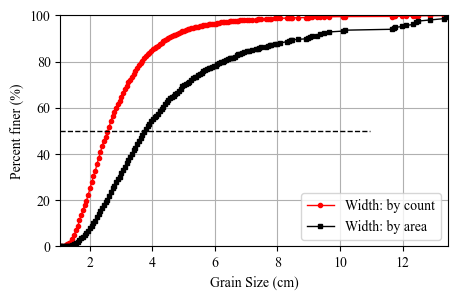

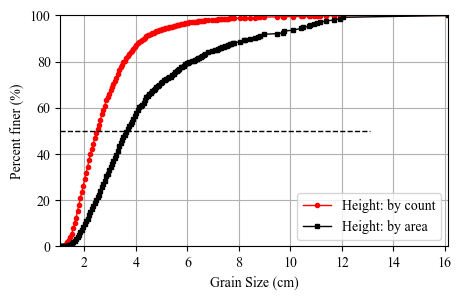

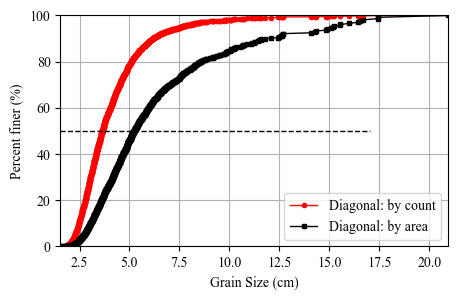

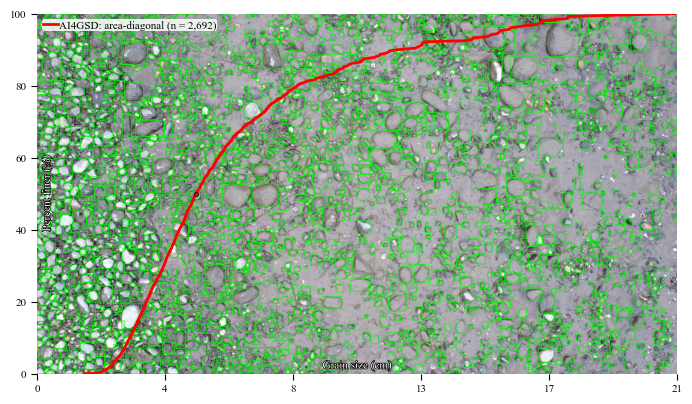

2/2: DJI_0113_4515.png, resolution 0.74 mm/px (100.00%), 19.66 s
Detected 754 rocks, diagonal and count based D10, D50, D60, and D84 are: 4.90, 8.09, 9.11, and 13.66 cm
Detected 754 rocks, diagonal and area  based D10, D50, D60, and D84 are: 6.87, 13.47, 14.78, and 20.84 cm


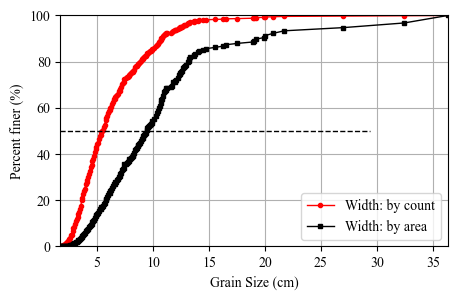

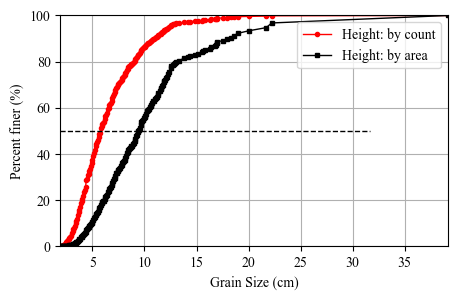

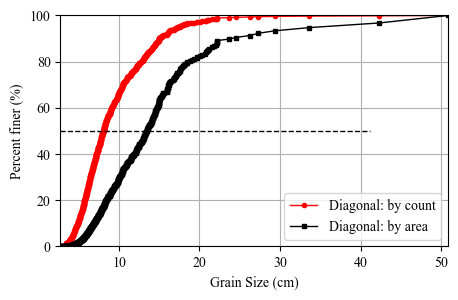

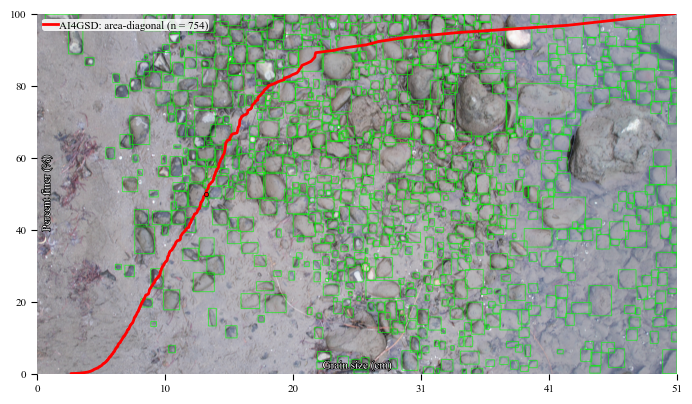

Output folder summary data to: D:\Github\AI4GSD\Demo_Data\20241130_YC_DJIFieldTest\grains_predicts\20241130_YC_DJIFieldTest_YOLO11m.1280.20250322_35\Statistics_V3_20241130_YC_DJIFieldTest_YOLO11m.1280.20250322_35.csv
Total number of grains: 3446, number of grains per photo: 1723.00
Total time: 38.62 s, time per photo 19.31 s

Output all summary data to: D:\Github\AI4GSD\Demo_Data\20241130_YC_DJIFieldTest\Statistics_V3_20241130_YC_DJIFieldTest_YOLO11m.1280.20250322_35.csv
Total execution time: 38.66 s


In [13]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.ModelName = 'YOLO11m.1280.20250322'
PP.YOLOSave = False
PP.SaveOverlayLabel = False
PP.OverWriteAll = True
PP.PrintOnScreen = True  
PP.OverlayFontSize = 4
PP.OverlayLegendFontSize = 4
PP.OverlayGSDTickLineWidth = 4
gsd = AI4GSD.Photo2GSD(PP)